In [4]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [73]:
max_length0 = '40mlength'
fold = '*'
path = 'C:/Users/minsu/Desktop/Work/current/mlpractical/semester2/TwitterSA/code/reports/*fold{}.csv'.format(fold)

In [100]:
def read_reports(path, kernels, max_length, layers=''):
    dfs = []
    layer_sizes = []
    accuracy_values = []
    all_files = glob.glob(path)
    for filename in all_files:
        if kernels in filename and max_length in filename and layers in filename:
            dfs.append(pd.read_csv(filename))
            layer_substring_location = filename.find('cnn')
            layer_number = filename[layer_substring_location - 2:layer_substring_location]
            if not layer_number.isnumeric:
                layer_number = layer_number[1:len(kernel_number)]
            lsize = int(layer_number)
            layer_sizes.append(lsize)
    for k in range(len(layer_sizes)):
        if layer_sizes[k] < 0:
            layer_sizes[k] = -layer_sizes[k]
        accuracy_values.append(dfs[k].loc[3][1])
    sorted_data = sorted(zip(layer_sizes, accuracy_values), key=lambda x: x[0])
    layer_sizes, accuracy_values = zip(*sorted_data)
    print(layer_sizes, accuracy_values)
    return layer_sizes, accuracy_values

In [95]:
def cal_average(layer_sizes, accuracy_values):
    identical = 1
    new_layer_sizes = [layer_sizes[0]]
    new_accuracy_values = [accuracy_values[0]]
    current_layer = layer_sizes[0]
    current_idx = 0
    current_layer_count = 1
    for i in range(1, len(layer_sizes)):
        next_layer = layer_sizes[i]
        if next_layer != current_layer:
            identical = max(identical, current_layer_count)
            current_layer = next_layer
            current_layer_count = 1
            current_idx += 1
            new_layer_sizes.append(next_layer)
            new_accuracy_values.append(accuracy_values[i])
        else:
            past_acc_sum = new_accuracy_values[current_idx] * current_layer_count
            current_layer_count += 1
            new_accuracy_values[current_idx] = (past_acc_sum + accuracy_values[i]) / current_layer_count
    print(len(new_layer_sizes), len(new_accuracy_values))
    print(new_layer_sizes, new_accuracy_values)
    print(identical)
    return new_layer_sizes, new_accuracy_values

In [101]:
kernel0 = '-3kernel'

layer_sizes0, accuracy_values0 = read_reports(path, kernel0, max_length0)
layer_sizes0, accuracy_values0 = cal_average(layer_sizes0, accuracy_values0)

(1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10) (0.9606214211959072, 0.9639068806908851, 0.961560123908758, 0.9624518914859664, 0.9628273725711068, 0.9646109077255234, 0.9637191401483152, 0.9676616915422884, 0.9675208861353608, 0.9685534591194968, 0.9648925185393786, 0.9680841077630714, 0.9669107293720078, 0.9671923401858632, 0.96658218342251, 0.965972026659157, 0.9668637942363654, 0.9650802590819488, 0.9644701023185956, 0.9676616915422884, 0.9593541725335586, 0.9666760536937952, 0.9639538158265276, 0.9661597672017272, 0.9602459401107668, 0.9606214211959072, 0.9635783347413874, 0.9668168591007228, 0.9643762320473106, 0.9647986482680936, 0.9611377076879752, 0.9665352482868677, 0.9622172158077535, 0.9590256265840608, 0.962592696892894, 0.9649394536750212, 0.9638599455552428, 0.9598704590256266, 0.9617947995869708, 0.962592696892894, 0.9589317563127756, 0.9586501454989204, 0.9586501454989204, 0.958368

In [102]:
kernel1 = '-4kernel'

layer_sizes1, accuracy_values1 = read_reports(path, kernel1, max_length0)
layer_sizes1, accuracy_values1 = cal_average(layer_sizes1, accuracy_values1)

(1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10) (0.961372383366188, 0.9636722050126724, 0.9617478644513284, 0.9616070590444008, 0.9607622266028348, 0.9657373509809444, 0.96639444287994, 0.9647047779968084, 0.964845583403736, 0.9638130104196, 0.9616539941800432, 0.9670515347789356, 0.9611846428236176, 0.9669107293720078, 0.961982540129541, 0.9599643292969116, 0.9654557401670892, 0.9619356049938984, 0.964845583403736, 0.961560123908758, 0.9556932319534404, 0.9655965455740168, 0.9635783347413874, 0.9586501454989204, 0.9593541725335586, 0.962076410400826, 0.9653149347601616, 0.9593541725335586, 0.9640007509621704, 0.9644701023185956, 0.958697080634563, 0.9639538158265276, 0.9615131887731156, 0.9628273725711068, 0.960152069839482, 0.9606214211959072, 0.9608091617384774, 0.9571012860227166, 0.962592696892894, 0.9611846428236176, 0.959213367126631, 0.9566319346662912, 0.957382896836572,

In [103]:
kernel2 = '-5kernel'

layer_sizes2, accuracy_values2 = read_reports(path, kernel2, max_length0)
layer_sizes2, accuracy_values2 = cal_average(layer_sizes2, accuracy_values2)

(1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9) (0.9616070590444008, 0.9629212428423918, 0.9626865671641792, 0.9627335022998216, 0.9593541725335586, 0.9639068806908851, 0.9669107293720078, 0.9623580212146812, 0.9639068806908851, 0.9645639725898808, 0.9606214211959072, 0.963202853656247, 0.9650333239463064, 0.9640946212334554, 0.9650802590819488, 0.9636722050126724, 0.961888669858256, 0.95808692387121, 0.9623580212146812, 0.9625457617572516, 0.9617947995869708, 0.9611377076879752, 0.9618417347226134, 0.961560123908758, 0.9632497887918896, 0.9607152914671924, 0.9532526049000282, 0.95808692387121, 0.964329296911668, 0.9602459401107668, 0.9610907725523328, 0.9620294752651836, 0.9596827184830564, 0.9444757345348728, 0.9567727400732188, 0.9606683563315498, 0.9627335022998216, 0.959119496855346, 0.9617478644513284, 0.9602459401107668, 0.9621702806721112, 0.964329296911668, 0.9609030320097623, 0.96484558340

In [104]:
layers3 = '1cnn'
kernel3 = '-3kernel'

kernel_sizes3, accuracy_values3 = read_reports(path, kernel3, max_length0, layers3)
kernel_sizes3, accuracy_values3 = cal_average(kernel_sizes3, accuracy_values3)

(1, 1, 1, 1, 1) (0.9606214211959072, 0.9639068806908851, 0.961560123908758, 0.9624518914859664, 0.9628273725711068)
1 1
[1] [0.9622735379705247]
1


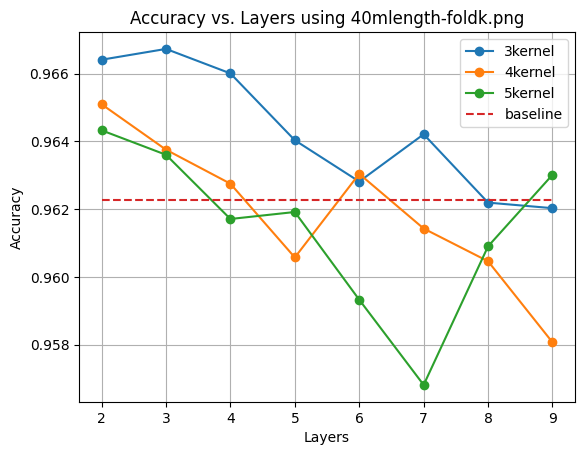

In [112]:
plt.plot(layer_sizes0[1:-1], accuracy_values0[1:-1], '-o', label=kernel0[1:])
plt.plot(layer_sizes1[1:-1], accuracy_values1[1:-1], '-o', label=kernel1[1:])
plt.plot(layer_sizes2[1:], accuracy_values2[1:], '-o', label=kernel2[1:])
plt.plot(layer_sizes2[1:], [accuracy_values3 for i in range(len(accuracy_values2[1:]))], '--', label='baseline')
plt.xticks([i for i in range(2, layer_sizes0[len(layer_sizes0)-2]+1, 2 if layer_sizes0[len(layer_sizes0)-1]>=20 else 1)])
plt.xlabel('Layers')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Layers using {0}-fold{1}.png'.format(max_length0, fold if fold != '*' else 'k'))
plt.grid(True)
plt.legend()
plt.savefig('./reports/figures/Accuracy vs. Layers using {0}-fold{1}.png'.format(max_length0, fold if fold != '*' else 'k'))
plt.show()